![](image.jpg)


Dive into the heart of data science with a project that combines healthcare insights and predictive analytics. As a Data Scientist at a top Health Insurance company, you have the opportunity to predict customer healthcare costs using the power of machine learning. Your insights will help tailor services and guide customers in planning their healthcare expenses more effectively.

## Dataset Summary

Meet your primary tool: the `insurance.csv` dataset. Packed with information on health insurance customers, this dataset is your key to unlocking patterns in healthcare costs. Here's what you need to know about the data you'll be working with:

## insurance.csv
| Column    | Data Type | Description                                                      |
|-----------|-----------|------------------------------------------------------------------|
| `age`       | int       | Age of the primary beneficiary.                                  |
| `sex`       | object    | Gender of the insurance contractor (male or female).             |
| `bmi`       | float     | Body mass index, a key indicator of body fat based on height and weight. |
| `children`  | int       | Number of dependents covered by the insurance plan.              |
| `smoker`    | object    | Indicates whether the beneficiary smokes (yes or no).            |
| `region`    | object    | The beneficiary's residential area in the US, divided into four regions. |
| `charges`   | float     | Individual medical costs billed by health insurance.             |



A bit of data cleaning is key to ensure the dataset is ready for modeling. Once your model is built using the `insurance.csv` dataset, the next step is to apply it to the `validation_dataset.csv`. This new dataset, similar to your training data minus the `charges` column, tests your model's accuracy and real-world utility by predicting costs for new customers.

## Let's Get Started!

This project is your playground for applying data science in a meaningful way, offering insights that have real-world applications. Ready to explore the data and uncover insights that could revolutionize healthcare planning? Let's begin this exciting journey!

In [154]:
# Re-run this cell
# Import required libraries
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Loading the insurance dataset
insurance_data_path = 'insurance.csv'
insurance = pd.read_csv(insurance_data_path)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


## **_Task 1: Clean up the data_**
---

1. Are there any missing values. ✅
2. Standardize the categories in the Region. ✅
3. Standardize the genders to just 2 categories. ✅
4. Convert the data type of smoker column to boolean. ✅
5. Standardize the Charges data type (Float). ✅
6. Convert the negative values in to positive values (absolute values). ✅

## **_Information about the insurance data_**
---

In [155]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB


## **_Data Cleaning_**
---

### 1. Checking the missing values in the dataset
---

In [156]:
print(f"Missing values in the dataset : \n {round((insurance.isnull().sum() / len(insurance)) * 100, 2)}")
print()

insurance_filled = insurance.dropna()

print(f"Information about the dataset after droping the missing values from the dataset : \n {insurance_filled.info()}")

Missing values in the dataset : 
 age         4.93
sex         4.93
bmi         4.93
children    4.93
smoker      4.93
region      4.93
charges     4.04
dtype: float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   object 
 5   region    1208 non-null   object 
 6   charges   1208 non-null   object 
dtypes: float64(3), object(4)
memory usage: 75.5+ KB
Information about the dataset after droping the missing values from the dataset : 
 None


### 2. Standadizing the Catogiers in the Region
---

In [157]:
# Extract all the unique categories from the Region

print(f"All the unique categoires before standardization: \n {insurance_filled['region'].unique()}")
print()

# Converting all the categories to lowercase
insurance_filled['region'] = insurance_filled['region'].str.lower()

print(f"All the unique categoires after standardization: {insurance_filled['region'].unique()}")
print()

All the unique categoires before standardization: 
 ['southwest' 'Southeast' 'southeast' 'northwest' 'Northwest' 'Northeast'
 'northeast' 'Southwest']

All the unique categoires after standardization: ['southwest' 'southeast' 'northwest' 'northeast']



### 3. Standardize the genders in the Sex
---

In [158]:
# Extract and Check the unique values in the Sex column
print(f"All the unique genders of Sex before standardization: {insurance_filled['sex'].unique()}")
print()

# Create a dictionary called gender_Map
FEMALE = "female"
MALE = "male"
gender_Map = {"F": FEMALE, "woman": FEMALE, "M": MALE, "man": MALE}

# Standardizing the genders based on the gender map.
insurance_filled['sex'] = insurance_filled['sex'].replace(gender_Map)

print(f"All the unique genders of Sex after standardization: {insurance_filled['sex'].unique()}")

All the unique genders of Sex before standardization: ['female' 'male' 'woman' 'F' 'man' 'M']

All the unique genders of Sex after standardization: ['female' 'male']


### 4. Data type conversion for Smokers to boolean
---

In [159]:
insurance_filled['smoker'] = (insurance_filled['smoker'] == 'yes')

### 5. Data type conversion of charges to float
---

In [160]:
insurance_filled['charges'] = insurance_filled['charges'].str.strip('$').astype('float64')
insurance_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1208 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1208 non-null   float64
 1   sex       1208 non-null   object 
 2   bmi       1208 non-null   float64
 3   children  1208 non-null   float64
 4   smoker    1208 non-null   bool   
 5   region    1208 non-null   object 
 6   charges   1207 non-null   float64
dtypes: bool(1), float64(4), object(2)
memory usage: 67.2+ KB


In [161]:
insurance_filled.sample(10)

,age,sex,bmi,children,smoker,region,charges
185,36.0,male,41.895,-3.0,True,northeast,43753.33705
686,42.0,male,26.125,2.0,False,northeast,7729.64575
232,19.0,female,17.800,0.0,False,southwest,1727.78500
245,54.0,male,30.020,0.0,False,northwest,24476.47851
940,18.0,male,23.210,-0.0,False,southeast,1121.87390
1111,38.0,male,38.390,3.0,True,southeast,41949.24410
148,53.0,female,37.430,1.0,False,northwest,10959.69470
969,39.0,female,34.320,5.0,False,southeast,8596.82780
322,34.0,male,30.800,0.0,True,southwest,35491.64000
1041,-18.0,male,23.085,0.0,False,northeast,1704.70015


### 6. Conversion of all negative values to positive values (aboslute) in the dataframe.
---

In [162]:
insurance_pos = insurance_filled.apply(lambda x : x.abs() if np.issubdtype(x.dtype, np.number) else x)
insurance_pos.sample(10)

,age,sex,bmi,children,smoker,region,charges
1006,28.0,male,29.260,2.0,False,northeast,4438.26340
438,52.0,female,46.750,5.0,False,southeast,12592.53450
131,61.0,female,22.040,0.0,False,northeast,13616.35860
302,56.0,female,37.510,2.0,False,southeast,12265.50690
118,49.0,female,27.170,0.0,False,southeast,8601.32930
1284,61.0,male,36.300,1.0,True,southwest,47403.88000
552,62.0,male,21.400,0.0,False,southwest,12957.11800
50,18.0,female,35.625,0.0,False,northeast,2211.13075
947,37.0,male,34.200,1.0,True,northeast,39047.28500
234,39.0,male,24.510,2.0,False,northwest,6710.19190


## _**Visualization of relationshi between Independent and Dependent features**_
---

### Import the required visualization libraries
---

In [163]:
import matplotlib.pyplot as plt
df = insurance_pos.copy()

Text(0, 0.5, 'Charges')

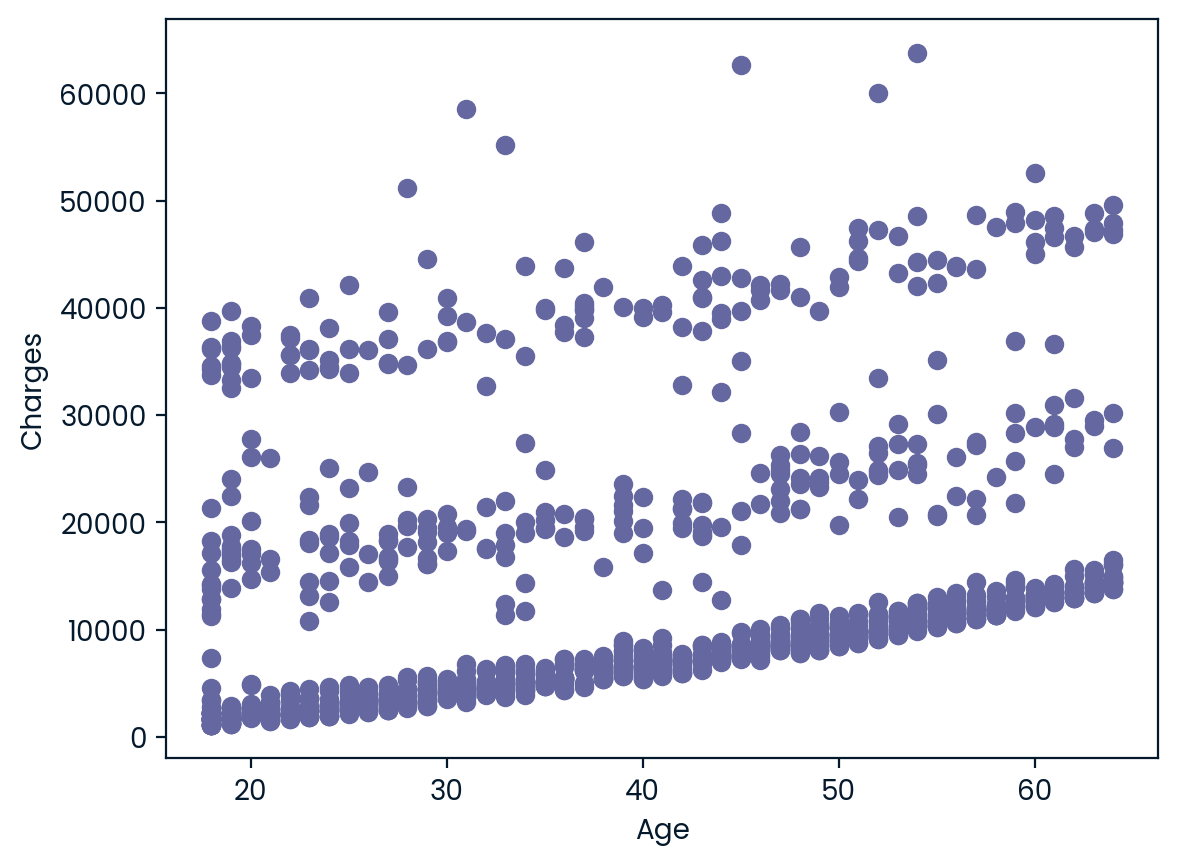

In [164]:
# 1. Relation between Age and Charges
plt.scatter(df['age'], df['charges'])
plt.xlabel("Age")
plt.ylabel("Charges")

Text(0, 0.5, 'Charges')

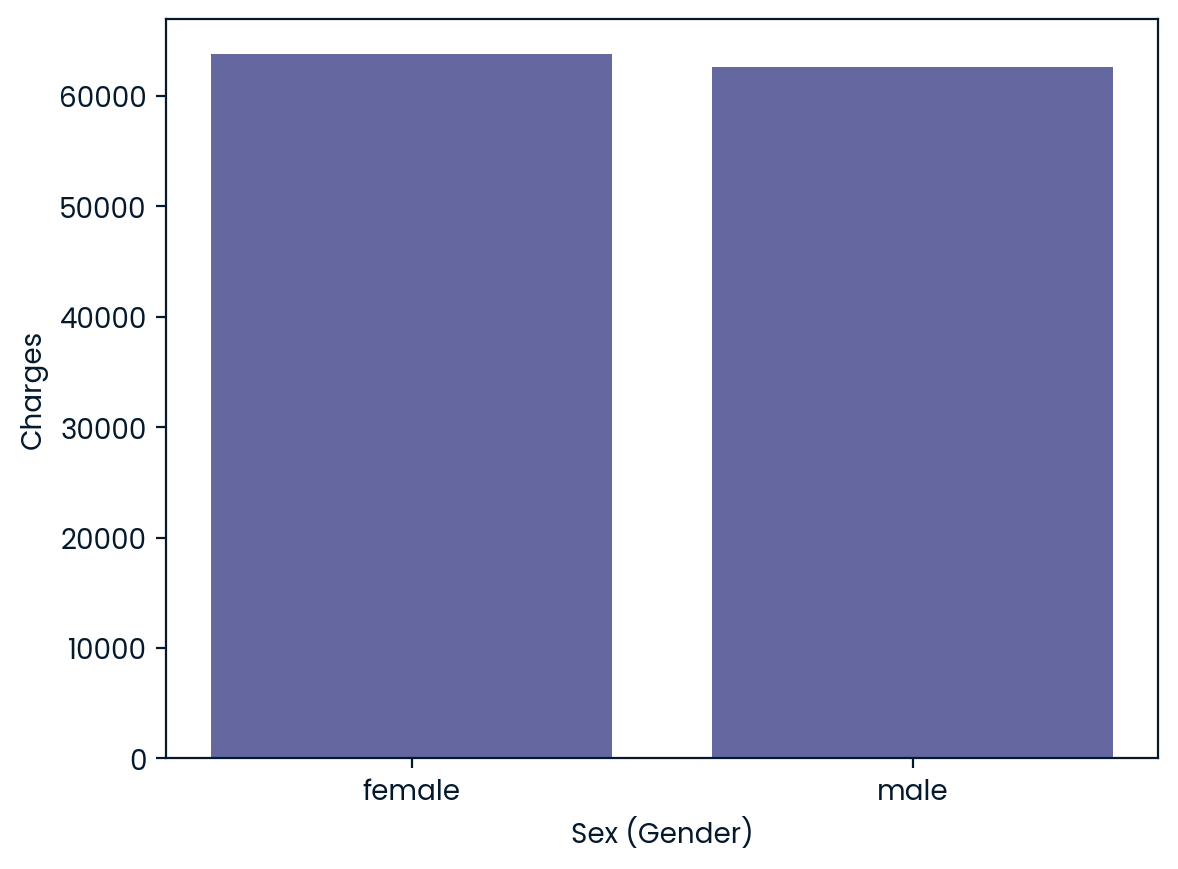

In [165]:
# 2. Relation between Sex (genders) and Charges
plt.bar(df['sex'], df['charges'])
plt.xlabel("Sex (Gender)")
plt.ylabel("Charges")

Text(0, 0.5, 'Charges')

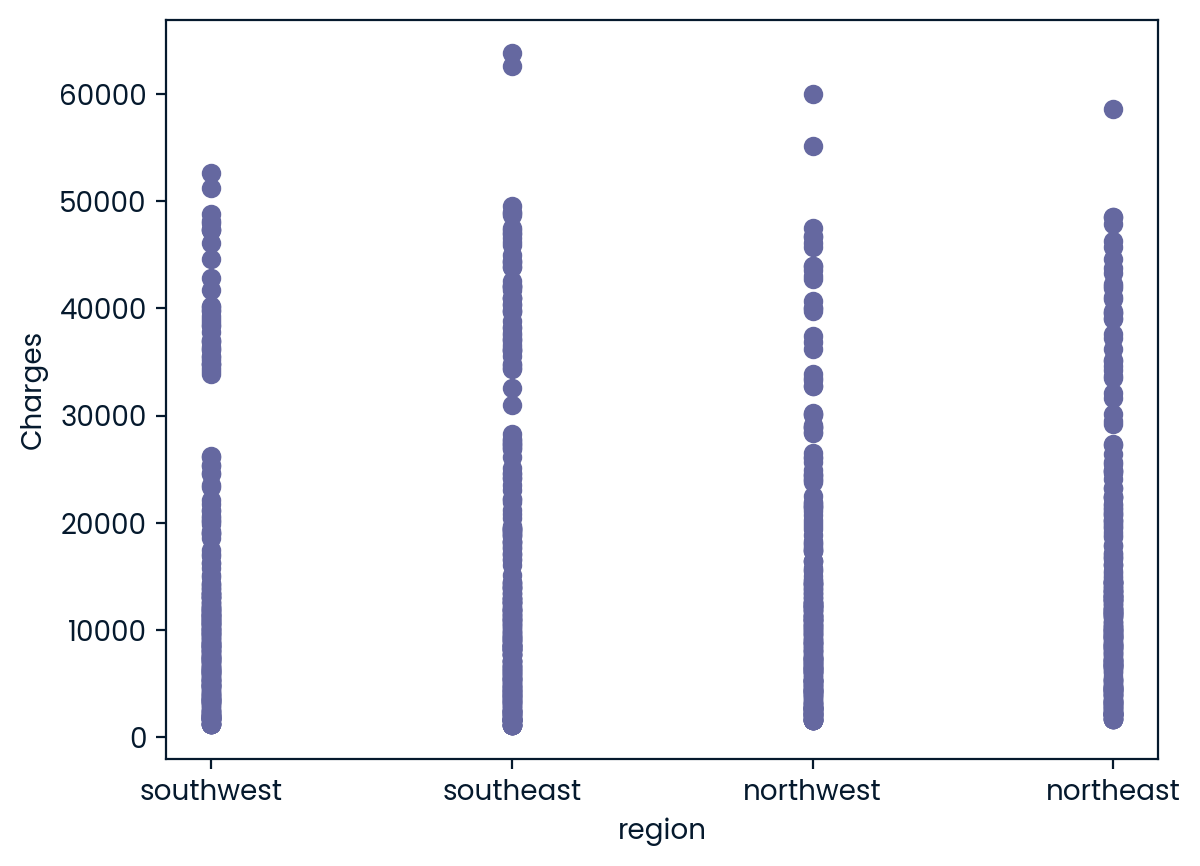

In [166]:
# 3. Relation between Region and Charges
plt.scatter(df['region'], df['charges'])
plt.xlabel("region")
plt.ylabel("Charges")

Text(0, 0.5, 'Charges')

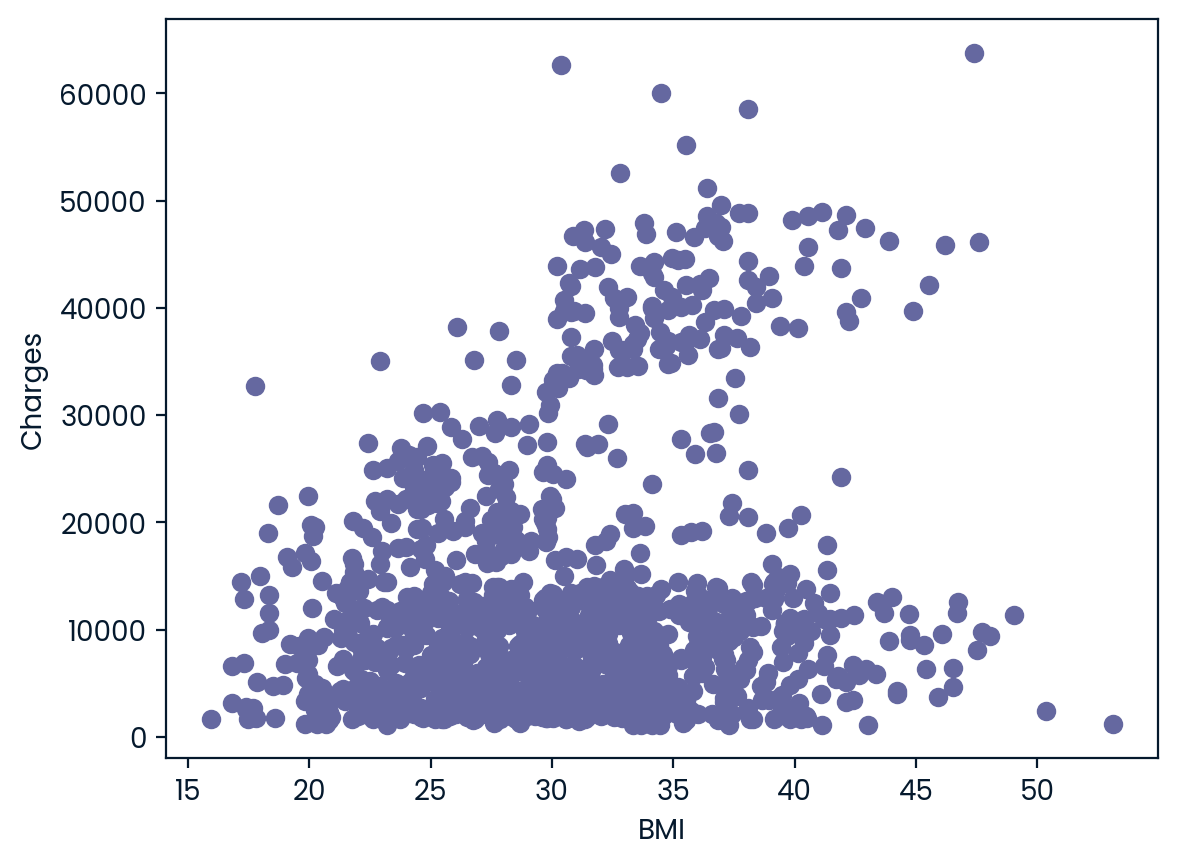

In [167]:
# 4. Relation between bmi and Charges
plt.scatter(df['bmi'], df['charges'])
plt.xlabel("BMI")
plt.ylabel("Charges")

Text(0, 0.5, 'Charges')

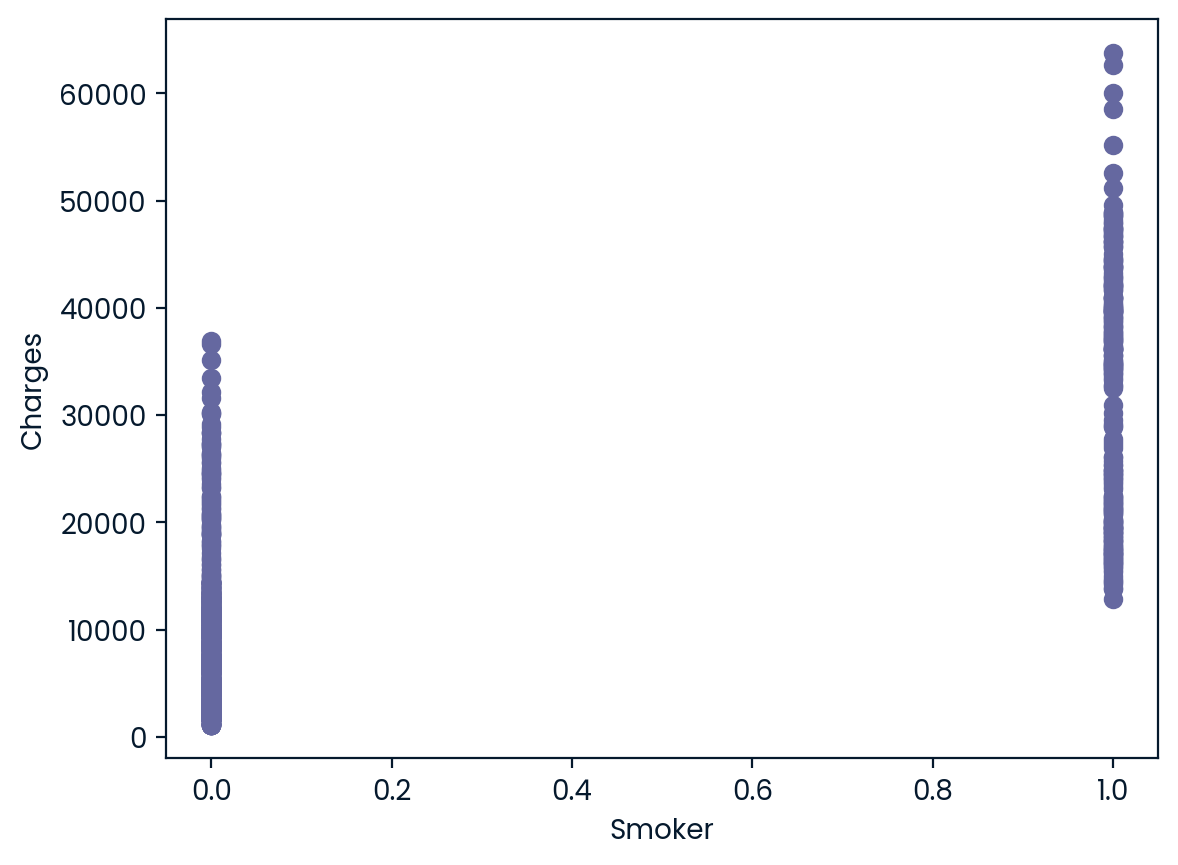

In [168]:
# 4. Relation between smoker and Charges
plt.scatter(df['smoker'], df['charges'])
plt.xlabel("Smoker")
plt.ylabel("Charges")

## _**Task 3: Prepare the data for model fitting.**_
---

In [169]:
df_New = pd.get_dummies(df, prefix= ['region'], columns= ['region'])
df_New.drop(columns=['region_southeast'], inplace = True)

df_New['smoker'] = df_New['smoker'].astype("int64")

df_New['is_Male'] = (df_New['sex'] == "male").astype("int64")
df_New.drop(columns= ['sex'], inplace= True)

df_New.dropna(inplace= True)

df_New.head(10)

,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest,is_Male
0,19.0,27.900,0.0,1,16884.92400,0,0,1,0
1,18.0,33.770,1.0,0,1725.55230,0,0,0,1
2,28.0,33.000,3.0,0,4449.46200,0,0,0,1
3,33.0,22.705,0.0,0,21984.47061,0,1,0,1
4,32.0,28.880,0.0,0,3866.85520,0,1,0,1
5,31.0,25.740,0.0,0,3756.62160,0,0,0,0
6,46.0,33.440,1.0,0,8240.58960,0,0,0,0
7,37.0,27.740,3.0,0,7281.50560,0,1,0,0
8,37.0,29.830,2.0,0,6406.41070,1,0,0,1
9,60.0,25.840,0.0,0,28923.13692,0,1,0,0


## _**Task 4: Fit a Linear Regression model to the data**_
---

### Import the required libraries
---

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [171]:
# Seperation of Independent and Dependent variables
X = df_New.drop(columns= ['charges'])
y = df_New['charges']

# Split the data into train and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [172]:
# Create the Linear model and train the model using the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make the predictions on the testing data
y_Prediction = model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_Prediction)
print(f"Mean Sqaured Error (MSE): {mse}")
print()

# The r2_Score
r2_score = r2_score(y_test, y_Prediction)
print(f"The R2_Score: {r2_score}")

Mean Sqaured Error (MSE): 39936613.363110945

The R2_Score: 0.7049323160872818


## _**Task 5: See how the model perform on the validation dataset**_
---

### Import the dataset
---

In [173]:
val_df = pd.read_csv("validation_dataset.csv")
val_df.sample(10)

,age,sex,bmi,children,smoker,region
41,35.0,male,39.710000,4.0,no,northeast
22,33.0,female,35.530000,0.0,yes,northwest
5,70.0,female,72.958351,11.0,yes,southeast
19,55.0,female,26.980000,0.0,no,northwest
26,74.0,female,65.454749,13.0,yes,northeast
44,26.0,male,32.490000,1.0,no,northeast
49,44.0,female,38.060000,0.0,yes,southeast
8,48.0,female,36.575000,0.0,no,northwest
28,57.0,female,25.740000,2.0,no,southeast
4,28.0,male,38.060000,0.0,no,southeast


### Create a helper function to preprocess the dataframe
---

In [174]:
def preprocess_df(df):
    df_New = pd.get_dummies(df, prefix= ['region'], columns= ['region'])
    df_New.drop(columns=['region_southeast'], inplace = True)

    df_New['smoker'] = (df_New['smoker'] == 'yes').astype("int64")

    df_New['is_Male'] = (df_New['sex'] == "male").astype("int64")
    df_New.drop(columns= ['sex'], inplace= True)
    
    return df_New

input_df = preprocess_df(val_df)
validation_Data.sample(10)

,age,bmi,children,smoker,region_northeast,region_northwest,region_southwest,is_Male
29,45.0,33.700,1.0,0,0,0,1,1
1,39.0,26.410,0.0,1,1,0,0,1
12,60.0,24.530,0.0,0,0,0,0,0
48,61.0,33.915,0.0,0,1,0,0,1
33,63.0,26.220,0.0,0,0,1,0,0
19,55.0,26.980,0.0,0,0,1,0,0
35,46.0,40.375,2.0,0,0,1,0,1
32,44.0,20.235,1.0,1,1,0,0,0
30,27.0,32.395,1.0,0,1,0,0,0
6,29.0,32.110,2.0,0,0,1,0,0


In [175]:
predictions = model.predict(input_df)
# predictions_new = [x if x > 0 else 1000 for x in predictions]

In [176]:
validation_data = val_df.copy()
validation_data['predicted_charges'] = predictions
validation_data.loc[validation_data['predicted_charges'] < 1000, 'predicted_charges'] = 1000

In [177]:
validation_data.head()

,age,sex,bmi,children,smoker,region,predicted_charges
0,18.0,female,24.090000,1.0,no,southeast,1000.000000
1,39.0,male,26.410000,0.0,yes,northeast,30956.214707
2,27.0,male,29.150000,0.0,yes,southeast,27799.409607
3,71.0,male,65.502135,13.0,yes,southeast,57194.414804
4,28.0,male,38.060000,0.0,no,southeast,6685.426312
